# Clustering

Vamos a realizar operaciones de **clustering** (segmentación) de datos.
La idea es encontrar una estructura dentro de un dataset donde originalmente no la había.
No se tiene un objetivo de predicción (se trata **aprendizaje no supervisado**), sino de uno de entendimiento de los datos a través del particionamiento del dataset en grupos de instancias.

# Parte 1. K-Means con datos sintéticos

Para poder entender como se utilizan los algoritmos de clustering, vamos inicialmente a crear un dataset sintético con datos ficticios que nos permita ilustrar los aspectos de llamado a los métodos de python.

Vamos a generar y visualizar en un plot 300 puntos aleatorios distribuidos alrededor de 4 centros en un espacio bidimensional, con una desviación estándar de 0.7. 

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

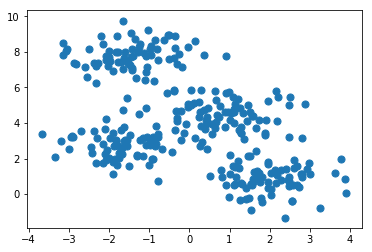

In [78]:
from sklearn.datasets.samples_generator import make_blobs
X, grupo = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

En X van a quedar las coordenadas de los puntos y en **grupo** los clusters originales a los que pertencen los datos.

In [79]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [80]:
grupo[0:5]

array([1, 3, 0, 3, 1])

El algoritmo de K-Means recibe como parámetro el número de clusters que se buscan (hay que sepecificarlo ya que no lo determina automáticamente). Como sabemos que los datos sintéticos se crearon con 4 grupos, vamos a analizar si K-Means los logra detectar.

In [81]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
grupo_kmeans = kmeans.predict(X)

Vamos a plotear los clusters encontrados con diferentes colores.

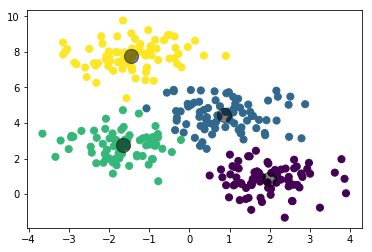

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Ahora comparemos los grupos encontrados con los reales, utilizando una matriz de confusión.

array([[ 0, 75,  0,  0],
       [74,  1,  0,  0],
       [ 0,  3, 72,  0],
       [ 0,  2,  0, 73]])

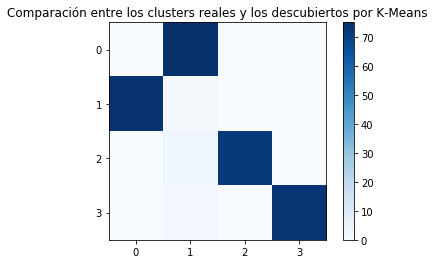

In [83]:
cm = confusion_matrix(grupo, grupo_kmeans)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Comparación entre los clusters reales y los descubiertos por K-Means")
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, ['0','1','2','3'])
plt.yticks(tick_marks, ['0','1','2','3'])
cm

En las filas encontramos los grupos reales y en las columnas los de K-Means. Encontramos 6 errores, todos asociados por k-means al grupo 0 cuando eran de alguno de los otros 3 grupos.

Hay que tener en cuenta que el orden de los nombres de los grupos generados puede no conincidir con el orden de los grupos encontrados por K-Means, como es el caso aquí.

Lo que vemos es que parece haber una concordancia entre los clusters encontrados por K-Means y los reales: los grupos 0, 1, 2 y 3 de k-means corresponden a los grupos 1, 0, 2, y 3 encontrados por K-Means, respectivamente.

Vamos a cambiar el orden de los clusters de k-means para poder entender mejor los resultados

In [84]:
traducir = [1, 0, 2, 3]

grupo_kmeans_reorg = []
for g_k, g in zip(grupo_kmeans, grupo):
    grupo_kmeans_reorg.append(traducir[g_k])
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


Podemos hacer esto de una manera mas breve utilizando una de las particularidades de Python: List comprehensions, que permite resumir operaciones simples realizadas dentro de un ciclo:

In [85]:
grupo_kmeans_reorg = [traducir[g_k] for g_k in grupo_kmeans]
print(grupo_kmeans_reorg)

[0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2]


In [86]:
cm = confusion_matrix(grupo, grupo_kmeans_reorg)
cm

array([[75,  0,  0,  0],
       [ 1, 74,  0,  0],
       [ 3,  0, 72,  0],
       [ 2,  0,  0, 73]])

In [87]:
accuracy_score(grupo, grupo_kmeans_reorg)

0.98

Veamos gráficamente cuáles son los registros que se asocian a un grupo diferente a su original.

In [88]:
diferentes = []
for (x0, x1), g, gk in zip(X, grupo, grupo_kmeans_reorg):
    if g!=gk:
        diferentes.append([x0, x1])
        

In [89]:
X[0:5]

array([[ 0.43071995,  2.54925795],
       [-1.4687922 ,  7.26767764],
       [ 1.21486062,  5.36489604],
       [-0.94206983,  7.80806619],
       [ 1.01004604,  2.2241682 ]])

In [90]:
diferentes = np.array(diferentes)

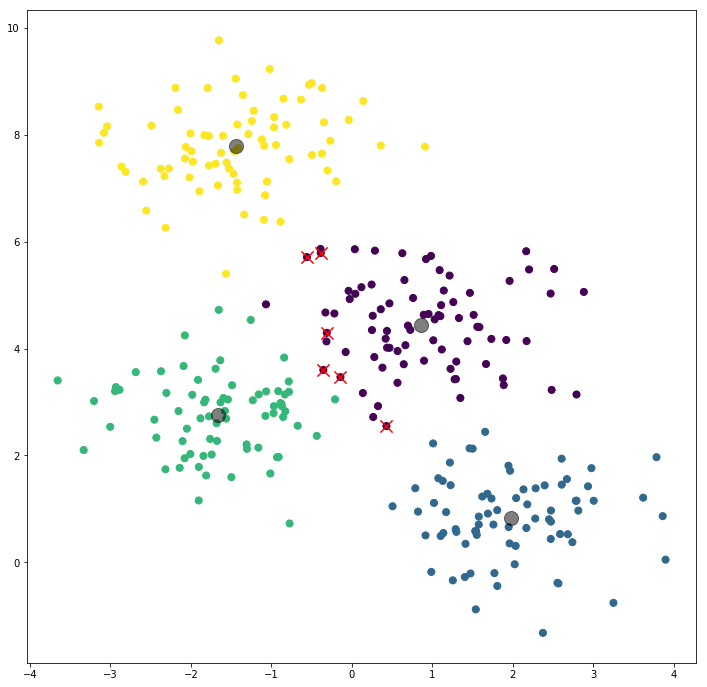

In [91]:
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1], c=grupo_kmeans_reorg, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.scatter(diferentes[:, 0], diferentes[:, 1], c='red', marker="x", s=150)

**Preguntas**:
Comparamos los grupos creados por el clustering con los originales (esto se llama "clasificación no supervisada")
1. Expliquen la primera matriz de confusión obtenida y el por qué fue necesario recodificar los segmentos obtenidos por el clustering.
2. ¿Qué tan bien puede K-Means encontrar las categorías originales en terminos de accuracy?
3. ¿Tiene sentido crear un test set para un clustering?

# Parte 2. K-Means con datos reales

In [92]:
data = pd.read_csv('01 - ComprasClientes.csv', na_values=".")
print(data.shape)
data.head(5)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [93]:
data.describe(include="all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


## Preparación de los datos

**¿Qué problemas saltan a la vista al inspeccionar los datos? Arréglenlos. **

1. Las variables Channel y Region tienen tipo int64, cuando en realidad codifican categorías de canales y de regiones. Es necesario cambiar sus tipos.
1. Tenemos en todas las variables de consumo valores anormalmente grandes que pueden considerarse excepciones en el mejor de los casos (anomalías o errores de captura en el peor de los casos). Hay que identificar los registros en cuestión y evaluar la posibilidad de descartarlos pues pueden influenciar negativamente muchos de los modelos que se pueden aprender a partir de los datos.
1. Las escalas de las variables que denotan los montos consumidos de cada tipo de productos son muy disparejas. Es necesario normalizar los datos ya que de no hacerlo se otorgaría una importancia demasiado desmedida a variables como Fresh casi que ignorando variables como Delicatessen.

Arreglamos primero los tipos de datos incorrectos:

In [95]:
data.Channel = data.Channel.astype(str)
data.Region = data.Region.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


Antes de normalizar es necesario limpiar las excepciones o anomalías con valores o muy grandes o muy pequeñas. Vamos a analizar las variables numéricas a partir de diagramas de cajas y bigotes.

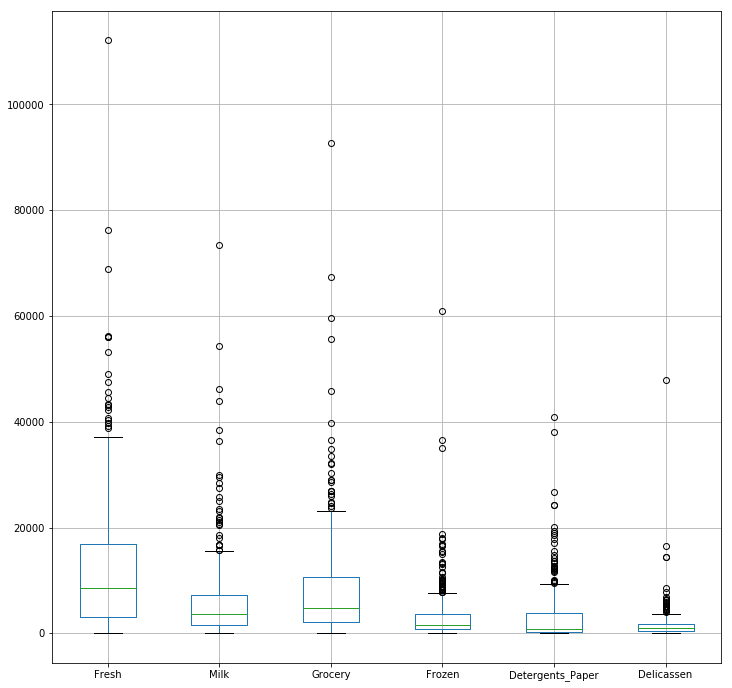

In [96]:
plt.figure(figsize=(12,12))
data.boxplot()

Vemos que hay valores muy importantes en todas las variables. Si contamos los puntos individuales más elevados podemos identificar 6 o menos puntos que sobrepasan la mayoría de los demás.
Puede que algunos de los puntos excepcionales en las diferentes variables correspondan a los mismos individuos. Vamos a identificar los top 6 de valores mas importantes en cada tipo de producto y no los vamos a considerar en los análisis siguientes.

In [97]:
temp = data.sort_values(['Fresh'], ascending=False)
print("Excepciones de Fresh: ", np.sort(temp[0:6].index.get_values()))
indicesAQuitar = temp[0:6].index.get_values()

temp = data.sort_values(['Milk'], ascending=False)
print("Excepciones de Milk: ", np.sort(temp[0:6].index.get_values()))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index.get_values())


temp = data.sort_values(['Grocery'], ascending=False)
print("Excepciones de Grocery: ", np.sort(temp[0:6].index.get_values()))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index.get_values())

temp = data.sort_values(['Frozen'], ascending=False)
print("Excepciones de Frozen: ", np.sort(temp[0:6].index.get_values()))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index.get_values())

temp = data.sort_values(['Detergents_Paper'], ascending=False)
print("Excepciones de Detergents_Paper: ", np.sort(temp[0:6].index.get_values()))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index.get_values())

temp = data.sort_values(['Delicassen'], ascending=False)
print("Excepciones de Delicassen: ", np.sort(temp[0:6].index.get_values()))
indicesAQuitar = np.union1d(indicesAQuitar, temp[0:6].index.get_values())

indicesAQuitar

Excepciones de Fresh:  [ 39 103 125 181 258 284]
Excepciones de Milk:  [ 23  47  61  85  86 183]
Excepciones de Grocery:  [ 47  61  65  85 211 333]
Excepciones de Frozen:  [ 93 103 183 196 325 413]
Excepciones de Detergents_Paper:  [ 47  61  65  85  86 333]
Excepciones de Delicassen:  [  2  23  71  87 181 183]


array([  2,  23,  39,  47,  61,  65,  71,  85,  86,  87,  93, 103, 125,
       181, 183, 196, 211, 258, 284, 325, 333, 413])

Tenemos 22 registros identificados como excepciones. Vemos que algunos tienen valores excepcionales según diferentes tipos de consumo (23, 47, 61, 65, 85, ...)

In [98]:
data.shape

(440, 8)

In [99]:
dataDepurado = data.loc[~data.index.isin(indicesAQuitar)]
dataDepurado.shape

(418, 8)

Vamos ahora a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos, por lo que no incluimos las variables Channel y Region.

In [100]:
dataStd = pd.DataFrame(preprocessing.scale(dataDepurado.iloc[:,2:]))
dataStd.columns=dataDepurado.columns[2:]

In [101]:
dataStd.mean(axis=0)

Fresh               1.540501e-17
Milk               -6.188564e-17
Grocery             3.612209e-17
Frozen             -3.665330e-17
Detergents_Paper    9.774212e-17
Delicassen          4.940227e-17
dtype: float64

In [102]:
dataStd.std(axis=0)

Fresh               1.001198
Milk                1.001198
Grocery             1.001198
Frozen              1.001198
Detergents_Paper    1.001198
Delicassen          1.001198
dtype: float64

## Clustering inicial

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.**

In [103]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd.iloc[:,0:6])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

El método KMeans en scikit-learn permite definir los valores de ciertos parámetros que controlan la ejecución del algoritmo de clustering. Nos interesan particularmente:
- **n_clusters**: número de clusters que se desean (el parámetro "K"). Por defecto es 8.
- **init**: el método de inicialización de los centroides. Por defecto es "k-means++". Otros valores son "random" o un array con los centroides iniciales
- **n_init**: número de inicializaciones diferentes a ensayar para evitar llegar a un óptimo local. Por defecto es 10
- **max_iter**: Máximo número de iteraciones que se esparará para llegar a convergencia. Por defecto es 300.
- **tol**: tolerancia para determinar que se ha llegado o no a convergenia con respecto a la reducción del WSS (interia). Por defecto es 0.0001
- **random_state**: semilla de inicialización del generador pseudo-aleatorio para poder reproducir los resultados.

El objeto resultado del KMeans después de lanzado el ajuste del algoritmo consta de diferentes valores de salida:
- **cluster_centers_**: los centroides finales de los clusters.
- **labels_**: los clusters a los cuales termina perteneciendo cada instancia del set de aprendizaje.
- **interia_**: el WSS final.
- **n_iter_**: el número de iteraciones que tomó llegar a convergencia.

In [104]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:n",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 10 iteraciones llegar a convergencia, con un WSS final de:n 1389.125986554681 y los centroides siguientes: [[-0.54265067  1.30970855  1.56507053 -0.35585007  1.56828129  0.34695352]
 [-0.27589129 -0.41913581 -0.44117296 -0.30271382 -0.38972917 -0.31984657]
 [ 1.21368532 -0.15258411 -0.33507495  1.10757898 -0.46973042  0.49396266]]


In [105]:
kmeans.labels_

array([1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0,

Podemos utilizar el objeto kmeans resultante como modelo de clasificación, al que a través del método *predict* se le puede enviar un dataset para evaluar y obtener los clusters a los que pertenecen.

Por ejemplo, utilicémoslo para clasificar los mismos ejemplos de entrenamiento:

In [106]:
clusters = kmeans.predict(dataStd.iloc[:, 0:6])
clusters

array([1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0,

In [107]:
counter=Counter(clusters)
print(counter)

Counter({1: 238, 2: 93, 0: 87})


Tenemos 3 clusters de 238, 93 y 87 instancias cada uno.
Agregamos una columna al dataframe con los datos analizados que indique a que cluster pertenece cada registro.

In [108]:
dataStd.loc[:,'Cluster'] = clusters

In [109]:
dataStd.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Cluster'],
      dtype='object')

In [110]:
dataStd[0:5]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.189650,0.935012,0.073249,-0.805601,0.047187,0.083000,1
1,-0.371959,0.966262,0.364676,-0.273463,0.223754,0.448833,0
2,0.249293,-0.781752,-0.411737,1.322266,-0.570941,0.458856,2
3,1.184974,0.073383,0.020539,0.466650,-0.208678,3.296150,2
4,-0.136187,0.651522,-0.280326,-0.650222,-0.203544,0.177382,1


# Parte 3. Interpretación de los clusters

## Interpretación de los clusters, con k =3

Vamos a tratar de entender cuales son las características de los registros que los componen. Para ello vamos a ver gráficos de densidad que permitan identificar las predilecciones de compras de los clientes que pertenecen a cada cluster.

In [111]:
var_num = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [112]:
import warnings
warnings.filterwarnings('ignore')

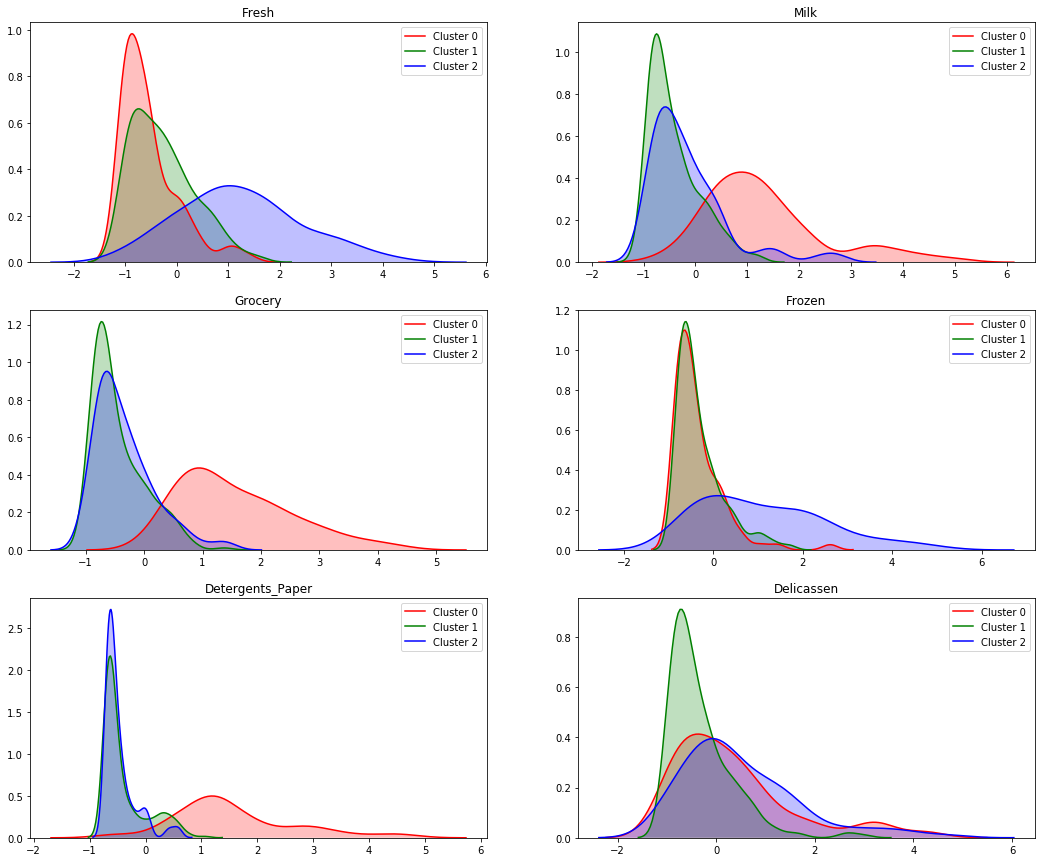

In [113]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Veamoslos en scatterplots para entender mejor las diferencias:

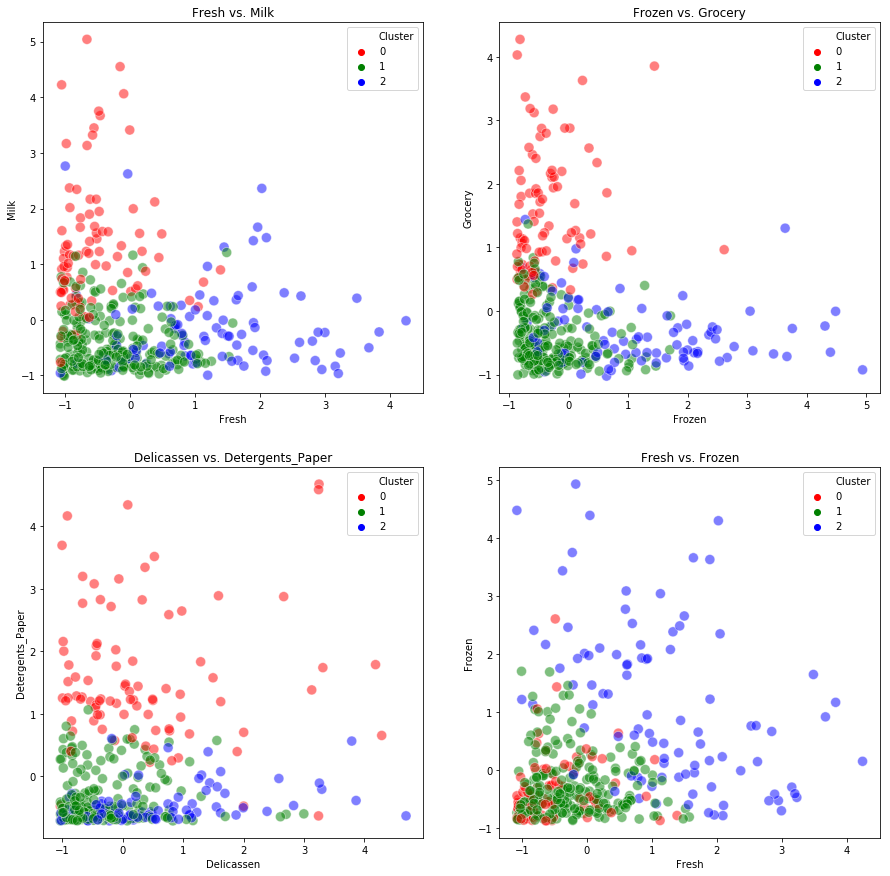

In [114]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="Fresh", y="Milk", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Milk")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="Frozen", y="Grocery", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Frozen vs. Grocery")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="Delicassen", y="Detergents_Paper", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Delicassen vs. Detergents_Paper")
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="Fresh", y="Frozen", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("Fresh vs. Frozen")
plt.show()

Cómo se puede distinguir entre:
- los rojos y los demás
- los verdes y los demás
- los azules y los demás

Podemos interpretar entonces los clusters de esta manera:
- Cluster 0 (Rojo, 238 registros). Tiene valores:
    - Altos : Milk, Grocery, Detergents_Paper
    - Medios: Delicassen
    - Bajos : Fresh, Frozen
- Cluster 1 (Verde, 93 registros). Tiene valores:
    - Altos : 
    - Medios: 
    - Bajos : Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen
- Cluster 2 (Azul, 87 registros). Tiene valores:
    - Altos : Fresh, Frozen
    - Medios: Delicassen
    - Bajos : Milk , Grocery, Detergents_Paper
    

**Qué podemos decir de los 3 clusters, qué adjetivo les darían para describirlos?**

## Interpretación de los clusters, con k = 4

Repetimos el análisis con k=4

...

...

...

...

## Interpretación de los clusters, con k = 2

Repetimos el análisis con k=2

...

...

...

...